<a href="https://colab.research.google.com/github/s-mostafa-a/visualizing-medical-data/blob/master/dicom_simpleitk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install SimpleITK

     |████████████████████████████████| 42.5MB 71kB/s 


In [2]:
!wget https://dl.dropbox.com/s/brm4ak8uzp10hzs/MammoTomoUPMC_Case1.tar.bz2

--2020-06-12 11:10:29--  https://dl.dropbox.com/s/brm4ak8uzp10hzs/MammoTomoUPMC_Case1.tar.bz2
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.82.15, 2620:100:6032:15::a27d:520f
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.82.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/brm4ak8uzp10hzs/MammoTomoUPMC_Case1.tar.bz2 [following]
--2020-06-12 11:10:30--  https://dl.dropboxusercontent.com/s/brm4ak8uzp10hzs/MammoTomoUPMC_Case1.tar.bz2
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.82.15, 2620:100:6032:15::a27d:520f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.82.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248449890 (237M) [application/octet-stream]
Saving to: ‘MammoTomoUPMC_Case1.tar.bz2’

MammoTomoUPMC_Case1 100%[===================>] 236.94M  12.0MB/s    in 20s     

2020-06-12 11:10:51 (11.7 MB/s) - ‘MammoTomoUPMC_

In [0]:
!mkdir breast
!tar -xjf /content/MammoTomoUPMC_Case1.tar.bz2 -C ./breast

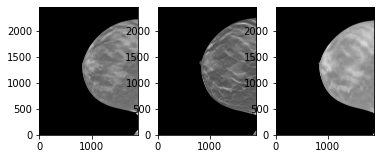

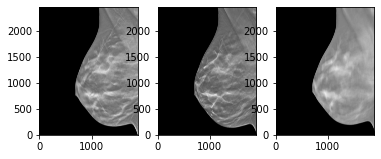

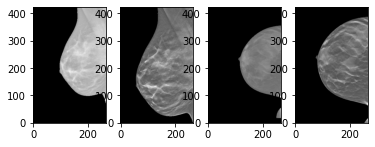

In [4]:
import SimpleITK as sitk
import sys
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def show_slices(slices):
  fig, axes = plt.subplots(1, len(slices))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice, cmap="gray", origin="lower")


def view_all_breast_dcms(directory='/content/breast/Case1 [Case1]/20080408 023126 [ - BREAST IMAGING TOMOSYNTHESIS]'):
  arrays = []
  for subdir in os.listdir(directory):
    for filee in os.listdir(f'{directory}/{subdir}'):
      path = f'{directory}/{subdir}/{filee}'
      arrays.append(sitk.GetArrayFromImage(sitk.ReadImage(path)))
  single_images = []

  for arr in arrays:
    if arr.shape[0] == 1:
      single_images.append(arr[0,:,:])
    else:
      show_slices([arr[0,:,:], arr[29,:,:], arr[59,:,:]])
  show_slices(single_images)


view_all_breast_dcms()


In [5]:
!wget https://mri.radiology.uiowa.edu/website_documents/visible_human_tar_files/VHMCT1mm_Head.tar.gz

--2020-06-12 11:12:06--  https://mri.radiology.uiowa.edu/website_documents/visible_human_tar_files/VHMCT1mm_Head.tar.gz
Resolving mri.radiology.uiowa.edu (mri.radiology.uiowa.edu)... 128.255.1.153
Connecting to mri.radiology.uiowa.edu (mri.radiology.uiowa.edu)|128.255.1.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31866153 (30M) [application/x-gzip]
Saving to: ‘VHMCT1mm_Head.tar.gz’

VHMCT1mm_Head.tar.g 100%[===================>]  30.39M  5.20MB/s    in 16s     

2020-06-12 11:12:24 (1.84 MB/s) - ‘VHMCT1mm_Head.tar.gz’ saved [31866153/31866153]



In [0]:
!mkdir head
!tar -xf /content/VHMCT1mm_Head.tar.gz -C ./head

(245, 512, 512)


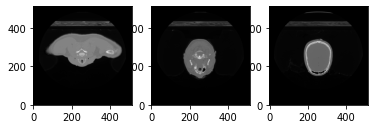

In [7]:
head_image = sitk.ReadImage(sitk.ImageSeriesReader_GetGDCMSeriesFileNames('/content/head/Head'))
head_array = sitk.GetArrayFromImage(head_image)
print(head_array.shape)
show_slices([head_array[0,:,:], head_array[100,:,:], head_array[200,:,:]])
